# Code for summarizing the xiRT results on the FAIMS data

Please see the README.md to get information about the result files.

In [1]:
import seaborn as sns
import pandas as pd
import glob
import matplotlib.pyplot as plt
import numpy as np

In [2]:
path = "../bash/results/xirt/"
files = glob.glob(path + "*summary*.csv", recursive=True)
df_results = pd.concat([pd.read_csv(i, index_col=0) for i in files])
df_results.head(5)

,r2,pearsonr,split,yaml
0,0.424,0.651,validation,xirt_faims_ordinal_aux0
1,0.572,0.756,training,xirt_faims_ordinal_aux0
2,0.309,0.556,prediction,xirt_faims_ordinal_aux0
3,0.264,0.513,validation,xirt_faims_ordinal_aux0
4,0.323,0.568,training,xirt_faims_ordinal_aux0


# Overview
Lets look at the best performing models (only check **prediction** folds). Aggregate the CV-folds by the mean. Result in first row, shows best performaning model (on average)

In [3]:
df_results = df_results.sort_values("pearsonr", ascending=False)
df_results[df_results["split"] == "prediction"].groupby("yaml").agg(np.mean).sort_values(by="pearsonr", ascending=False).round(2)

,r2,pearsonr
yaml,,
xirt_faims_reg_aux2,0.31,0.56
xirt_faims_reg_aux0,0.31,0.56
xirt_faims_reg_aux1,0.31,0.55
xirt_faims_reg_aux3,0.30,0.55
xirt_faims_reg_aux1_w10,0.27,0.52
xirt_faims_ordinal_aux1_w100,0.27,0.52
xirt_faims_ordinal_aux1,0.27,0.52
xirt_faims_ordinal_aux2,0.27,0.52
xirt_faims_ordinal_aux3,0.27,0.51


In [4]:
df_melt = df_results.melt(id_vars=["split", "yaml"])
print(df_melt.head(5))

order = df_results[df_results["split"] == "prediction"].groupby(["yaml"]).agg({"r2": np.mean, "pearsonr": np.mean}).sort_values(by="pearsonr", ascending=False).index.values
print(order)

      split                     yaml variable  value
0  training      xirt_faims_reg_aux3       r2  0.680
1  training      xirt_faims_reg_aux0       r2  0.665
2  training      xirt_faims_reg_aux2       r2  0.660
3  training  xirt_faims_ordinal_aux3       r2  0.655
4  training      xirt_faims_reg_aux3       r2  0.639
['xirt_faims_reg_aux2' 'xirt_faims_reg_aux0' 'xirt_faims_reg_aux1'
 'xirt_faims_reg_aux3' 'xirt_faims_reg_aux1_w10'
 'xirt_faims_ordinal_aux1_w100' 'xirt_faims_ordinal_aux1'
 'xirt_faims_ordinal_aux2' 'xirt_faims_ordinal_aux3'
 'xirt_faims_reg_aux1_w100' 'xirt_faims_ordinal_aux1_w10'
 'xirt_faims_ordinal_aux0']


# Plots by parameters name

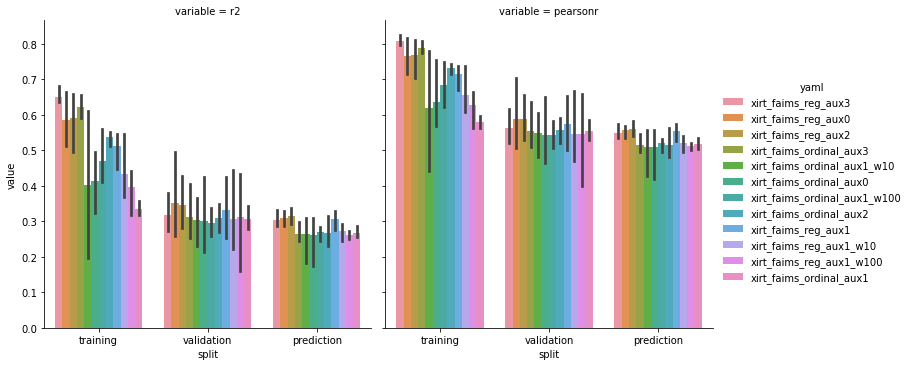

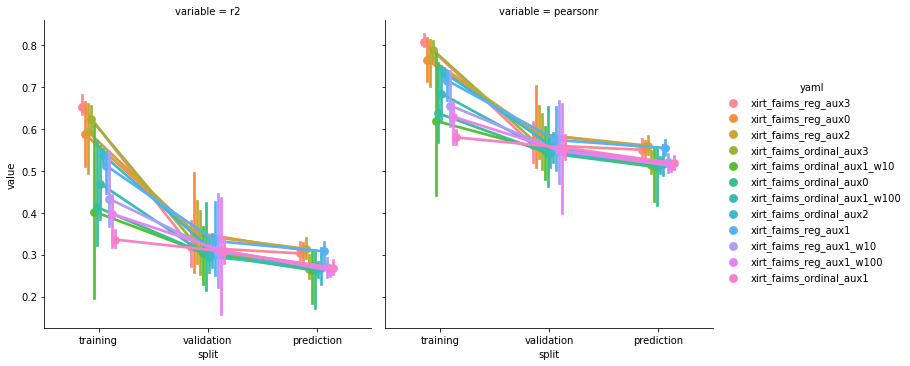

In [5]:
sns.catplot(x="split", y="value", hue="yaml", col="variable", data=df_melt, kind="bar", order=["training", "validation", "prediction"])
sns.catplot(x="split", y="value", hue="yaml", col="variable", data=df_melt, kind="point", order=["training", "validation", "prediction"], dodge=True)

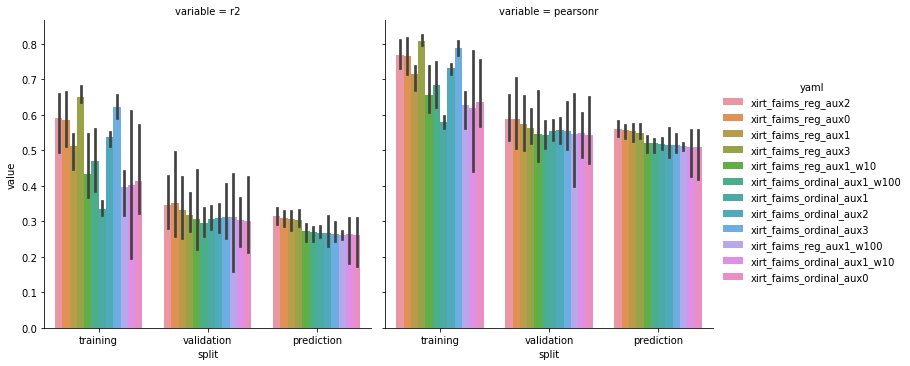

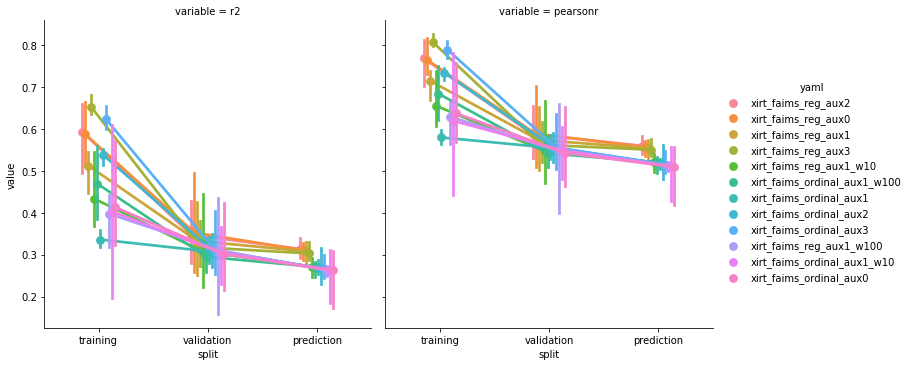

In [6]:
sns.catplot(x="split", y="value", hue="yaml", col="variable", data=df_melt, kind="bar", order=["training", "validation", "prediction"], hue_order=order)
sns.catplot(x="split", y="value", hue="yaml", col="variable", data=df_melt, kind="point", order=["training", "validation", "prediction"], dodge=True, hue_order=order)

# Results
The above plot shows the training and validation error depending on the used parameters for xiRT. Both R2 and PearsonR are best optimized towards 1
Take aways:
- predictions results are not so good
- large error bars, lowish pearson
- auxillary tasks seem to help, especially pi